In [1]:
import json

from pyspark.sql import SparkSession
from pyspark.sql.functions import hour, weekofyear, month, quarter, dayofweek, dayofmonth, dayofyear
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder
import numpy as np
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col, to_timestamp
from pyspark.sql.types import DoubleType
import pandas as  pd

from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [2]:
import matplotlib as plt

In [3]:


# # this code scrapes the weather APIs
# url = """https://archive-api.open-meteo.com/v1/era5?latitude=52.52&longitude=13.41&start_date=2023-01-01&end_date=2023-12-31&hourly=temperature_2m"""
# response = requests.get(url)
# print(response)
# data_json = response.json()
# print(json.dumps(data_json, indent=4))
# # this code structures the retrieved data in a form of DataFrame.
# df_json = {}
# for  item in list(data_json['hourly_units'].keys()) :
#     df_json[item] = data_json['hourly'][item]
# df_pandas = pd.DataFrame(df_json)  
# df_pandas['time'] = pd.to_datetime(df_pandas['time'])
# df_pandas    ReadSnappyParquet

In [4]:
spark = SparkSession.builder \
    .appName("ReadSnappyParquet") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.cores", "2") \
    .config("spark.driver.maxResultSize", "2g") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

your 131072x1 screen size is bogus. expect trouble
24/12/11 10:57:00 WARN Utils: Your hostname, LAPTOP-DN3PCHGN resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
24/12/11 10:57:00 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/11 10:57:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("TestSparkSession") \
    .getOrCreate()


24/12/11 10:57:14 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [6]:
# Đọc dữ liệu từ file parquet
parquet_path = "/home/hoan123/project-master/weather_data_transformed2024.csv"
df = spark.read.csv(parquet_path,header=True, inferSchema=True)

# Display the content
df.show()



+-------------------+-----+-------+--------+---------+------+--------+--------+---------+--------------------+
|           datetime| name|country|latitude|longitude|temp_c|wind_mph|humidity|precip_mm|           condition|
+-------------------+-----+-------+--------+---------+------+--------+--------+---------+--------------------+
|2024-10-18 05:00:00|Hanoi|Vietnam| 21.0333|   105.85|  25.0|     3.1|    89.0|      0.0|       Partly cloudy|
|2024-10-18 06:00:00|Hanoi|Vietnam| 21.0333|   105.85|  24.9|     3.4|    90.0|      0.0|       Partly cloudy|
|2024-10-18 07:00:00|Hanoi|Vietnam| 21.0333|   105.85|  25.9|     3.4|    85.0|      0.0|       Partly cloudy|
|2024-10-18 08:00:00|Hanoi|Vietnam| 21.0333|   105.85|  27.5|     4.3|    77.0|      0.2|   Light rain shower|
|2024-10-18 09:00:00|Hanoi|Vietnam| 21.0333|   105.85|  29.2|     4.9|    69.0|     0.06|Patchy rain possible|
|2024-10-18 10:00:00|Hanoi|Vietnam| 21.0333|   105.85|  30.7|     5.1|    62.0|     0.29|   Light rain shower|
|

In [7]:
# output_csv_path = "/home/hoan123/project-master/csv"
# df.write.csv(output_csv_path, header=True, mode="overwrite")
# df.coalesce(1).write.csv(output_csv_path, header=True, mode="overwrite")


In [8]:
df_pandas = df.toPandas() 

In [9]:
df = df.select("datetime", "temp_c")
df.show()

+-------------------+------+
|           datetime|temp_c|
+-------------------+------+
|2024-10-18 05:00:00|  25.0|
|2024-10-18 06:00:00|  24.9|
|2024-10-18 07:00:00|  25.9|
|2024-10-18 08:00:00|  27.5|
|2024-10-18 09:00:00|  29.2|
|2024-10-18 10:00:00|  30.7|
|2024-10-18 11:00:00|  31.7|
|2024-10-18 12:00:00|  32.4|
|2024-10-18 13:00:00|  31.8|
|2024-10-18 14:00:00|  31.5|
|2024-10-18 15:00:00|  31.4|
|2024-10-18 16:00:00|  30.7|
|2024-10-18 17:00:00|  29.9|
|2024-10-18 18:00:00|  28.6|
|2024-10-18 19:00:00|  27.7|
|2024-10-18 20:00:00|  27.1|
|2024-10-18 21:00:00|  26.6|
|2024-10-18 22:00:00|  26.3|
|2024-10-18 23:00:00|  26.0|
|2024-10-19 00:00:00|  25.4|
+-------------------+------+
only showing top 20 rows



In [10]:
# # Create a Spark session
# spark = SparkSession.builder.appName("example").config("spark.executor.memory", "4g").config("spark.driver.memory", "7g").getOrCreate()
# # df = spark.createDataFrame(df)

In [11]:
# Check for null values in each column
for column in df.columns:
    null_count = df.where(col(column).isNull()).count()
    print(f"Null values in column '{column}': {null_count}")

Null values in column 'datetime': 0
Null values in column 'temp_c': 0


In [12]:
# sampled_df = df.select("datetime", "temp_c").limit(3000)

# # Chuyển đổi Spark DataFrame sang Pandas DataFrame
# pandas_df = sampled_df.toPandas()

# # Chuyển đổi cột 'datetime' sang định dạng datetime của Pandas
# pandas_df['datetime'] = pd.to_datetime(pandas_df['datetime'])

# # Vẽ biểu đồ
# plt.figure(figsize=(12, 6))
# plt.plot(pandas_df['datetime'], pandas_df['temp_c'], color='blue', label='Temperature (°C)')

# # Tùy chỉnh biểu đồ
# plt.xlabel('Datetime')
# plt.ylabel('Temperature (°C)')
# plt.title('Temperature Over Time')
# plt.grid(True)
# plt.legend()
# plt.xticks(rotation=45)  # Xoay trục x để dễ đọc hơn
# plt.tight_layout()

# # Hiển thị biểu đồ
# plt.show()

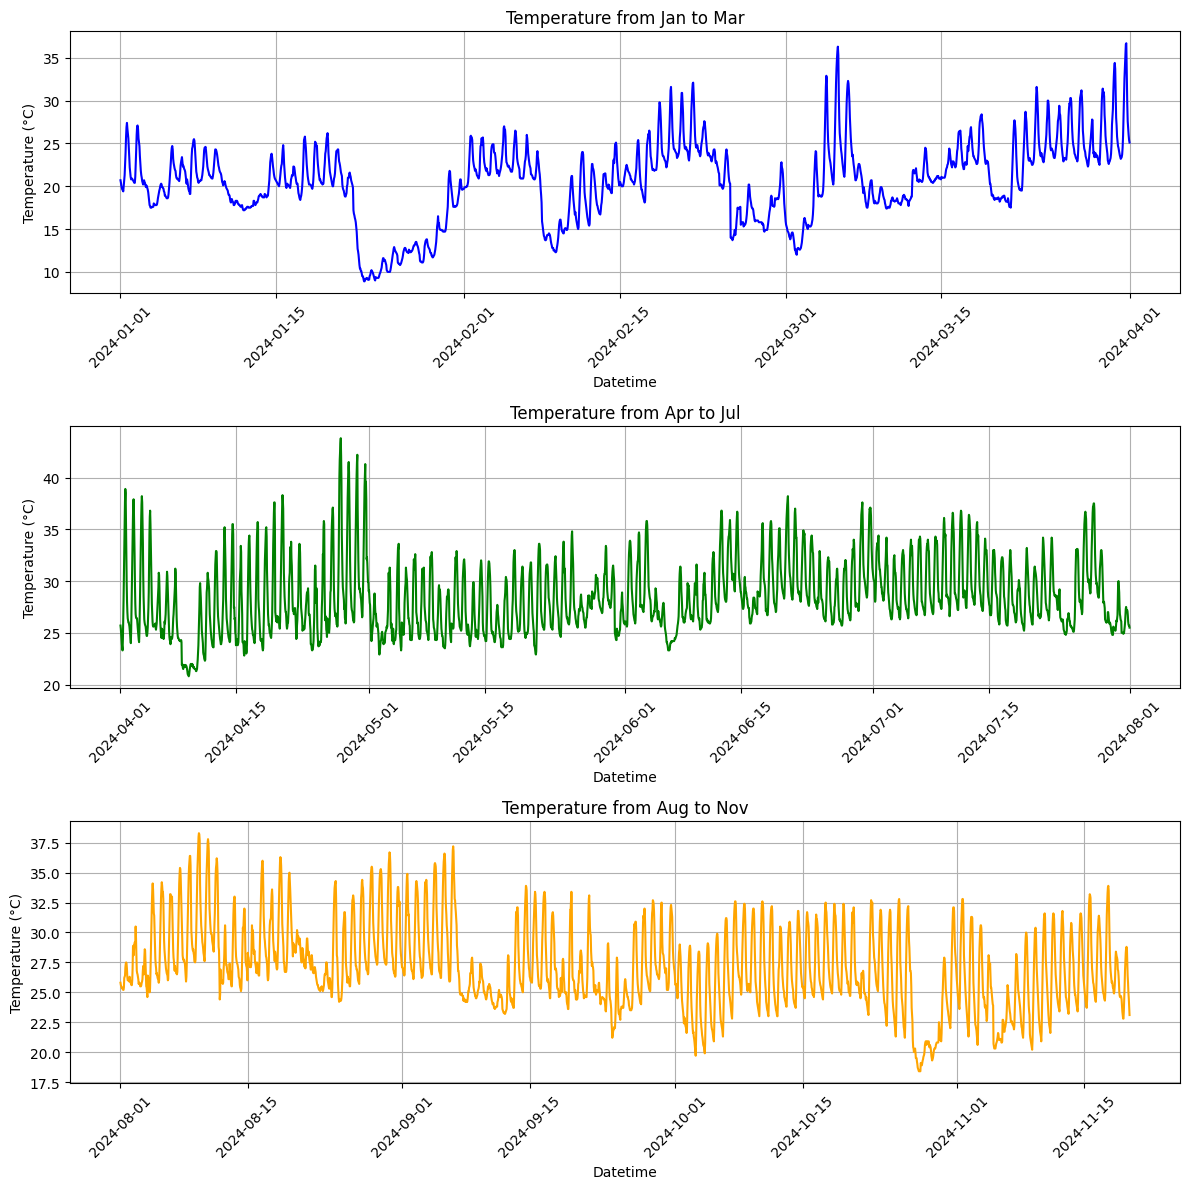

In [13]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import month

# Chia dữ liệu thành 3 khoảng thời gian
data_jan_mar = df.filter((month("datetime") >= 1) & (month("datetime") <= 3))
data_apr_jul = df.filter((month("datetime") >= 4) & (month("datetime") <= 7))
data_aug_nov = df.filter((month("datetime") >= 8) & (month("datetime") <= 11))


# Chuyển từng tập dữ liệu sang Pandas
data_jan_mar_pd = data_jan_mar.toPandas()
data_apr_jul_pd = data_apr_jul.toPandas()
data_aug_nov_pd = data_aug_nov.toPandas()
data_jan_mar_pd = data_jan_mar_pd.sort_values(by="datetime")
data_apr_jul_pd = data_apr_jul_pd.sort_values(by="datetime")
data_aug_nov_pd = data_aug_nov_pd.sort_values(by="datetime")
# Vẽ các biểu đồ
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=False)

# Biểu đồ cho tháng 1-3
axes[0].plot(data_jan_mar_pd['datetime'], data_jan_mar_pd['temp_c'], color="blue")
axes[0].set_title("Temperature from Jan to Mar")
axes[0].set_xlabel("Datetime")
axes[0].set_ylabel("Temperature (°C)")

# Biểu đồ cho tháng 4-7
axes[1].plot(data_apr_jul_pd['datetime'], data_apr_jul_pd['temp_c'], color="green")
axes[1].set_title("Temperature from Apr to Jul")
axes[1].set_xlabel("Datetime")
axes[1].set_ylabel("Temperature (°C)")

# Biểu đồ cho tháng 8-11
axes[2].plot(data_aug_nov_pd['datetime'], data_aug_nov_pd['temp_c'], color="orange")
axes[2].set_title("Temperature from Aug to Nov")
axes[2].set_xlabel("Datetime")
axes[2].set_ylabel("Temperature (°C)")

# Tùy chỉnh đồ thị
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

plt.tight_layout()
plt.show()


In [14]:
# limited_data

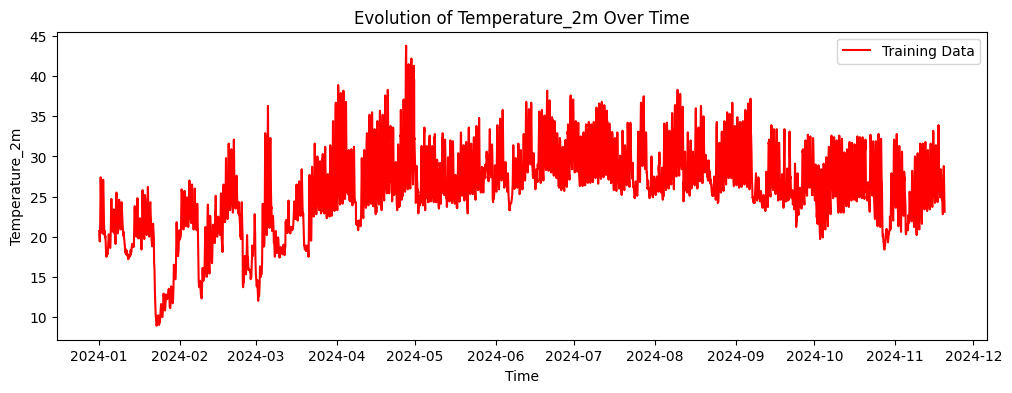

In [15]:
df = df.orderBy('datetime')
plt.figure(figsize=(12, 4))
plt.plot(df.select('datetime').rdd.flatMap(lambda x: x).collect()[-9000:], df.select('temp_c').rdd.flatMap(lambda x: x).collect()[-9000:], color='red', label='Training Data')
plt.xlabel('Time')
plt.ylabel('Temperature_2m')
plt.title('Evolution of Temperature_2m Over Time')
plt.legend()
plt.show()

In [16]:
# Select only the "time" and "assembled_features" columns
df = df.select("datetime", "temp_c")
df.show()

+-------------------+------+
|           datetime|temp_c|
+-------------------+------+
|2024-01-01 00:00:00|  20.7|
|2024-01-01 01:00:00|  20.4|
|2024-01-01 02:00:00|  20.0|
|2024-01-01 03:00:00|  19.8|
|2024-01-01 04:00:00|  19.6|
|2024-01-01 05:00:00|  19.6|
|2024-01-01 06:00:00|  19.4|
|2024-01-01 07:00:00|  20.0|
|2024-01-01 08:00:00|  20.5|
|2024-01-01 09:00:00|  21.3|
|2024-01-01 10:00:00|  22.5|
|2024-01-01 11:00:00|  23.9|
|2024-01-01 12:00:00|  25.7|
|2024-01-01 13:00:00|  26.9|
|2024-01-01 14:00:00|  27.4|
|2024-01-01 15:00:00|  26.7|
|2024-01-01 16:00:00|  26.2|
|2024-01-01 17:00:00|  25.6|
|2024-01-01 18:00:00|  24.6|
|2024-01-01 19:00:00|  23.4|
+-------------------+------+
only showing top 20 rows



In [17]:
data = df
df = (df
    .withColumn('hour', hour('datetime'))
    .withColumn('week', weekofyear('datetime'))
    .withColumn('month', month('datetime'))
    .withColumn('quarter', quarter('datetime'))
    .withColumn('day_of_week', dayofweek('datetime'))
    .withColumn('day_of_month', dayofmonth('datetime'))
    .withColumn('day_of_year', dayofyear('datetime'))
)
df.show()

+-------------------+------+----+----+-----+-------+-----------+------------+-----------+
|           datetime|temp_c|hour|week|month|quarter|day_of_week|day_of_month|day_of_year|
+-------------------+------+----+----+-----+-------+-----------+------------+-----------+
|2024-01-01 00:00:00|  20.7|   0|   1|    1|      1|          2|           1|          1|
|2024-01-01 01:00:00|  20.4|   1|   1|    1|      1|          2|           1|          1|
|2024-01-01 02:00:00|  20.0|   2|   1|    1|      1|          2|           1|          1|
|2024-01-01 03:00:00|  19.8|   3|   1|    1|      1|          2|           1|          1|
|2024-01-01 04:00:00|  19.6|   4|   1|    1|      1|          2|           1|          1|
|2024-01-01 05:00:00|  19.6|   5|   1|    1|      1|          2|           1|          1|
|2024-01-01 06:00:00|  19.4|   6|   1|    1|      1|          2|           1|          1|
|2024-01-01 07:00:00|  20.0|   7|   1|    1|      1|          2|           1|          1|
|2024-01-0

In [18]:
data = df 

In [19]:
# Select columns to normalize
columns_to_normalize = ['hour', 'week', 'month', 'quarter', 'day_of_week', 'day_of_month', 'day_of_year']
for col_name in columns_to_normalize:
    min_value = df.agg({col_name: 'min'}).collect()[0][0]
    max_value = df.agg({col_name: 'max'}).collect()[0][0]
    normalized_column = col_name + '_normalized'
    df = df.withColumn(normalized_column, (col(col_name) - min_value) / (max_value - min_value))
    df = df.drop(col_name).withColumnRenamed(normalized_column, col_name)

In [20]:
df.show()

+-------------------+------+--------------------+----+-----+-------+-------------------+------------+-----------+
|           datetime|temp_c|                hour|week|month|quarter|        day_of_week|day_of_month|day_of_year|
+-------------------+------+--------------------+----+-----+-------+-------------------+------------+-----------+
|2024-01-01 00:00:00|  20.7|                 0.0| 0.0|  0.0|    0.0|0.16666666666666666|         0.0|        0.0|
|2024-01-01 01:00:00|  20.4|0.043478260869565216| 0.0|  0.0|    0.0|0.16666666666666666|         0.0|        0.0|
|2024-01-01 02:00:00|  20.0| 0.08695652173913043| 0.0|  0.0|    0.0|0.16666666666666666|         0.0|        0.0|
|2024-01-01 03:00:00|  19.8| 0.13043478260869565| 0.0|  0.0|    0.0|0.16666666666666666|         0.0|        0.0|
|2024-01-01 04:00:00|  19.6| 0.17391304347826086| 0.0|  0.0|    0.0|0.16666666666666666|         0.0|        0.0|
|2024-01-01 05:00:00|  19.6| 0.21739130434782608| 0.0|  0.0|    0.0|0.16666666666666666|

In [21]:
data = df

In [22]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import functions as F

import matplotlib.pyplot as plt
def display_model_performance(model, test_data):
    # Make predictions on the test data
    predictions = model.transform(test_data)

    # Evaluate the model
    evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
    rmse = evaluator.evaluate(predictions)

    # Convert the PySpark DataFrame to a Pandas DataFrame
    result_df = predictions.select("label", "prediction").toPandas()

    # # Plot the graph
    # plt.plot(result_df['label'], result_df['prediction'], 'bo')
    # plt.xlabel('Temperature')
    # plt.ylabel('Prediction')
    # plt.suptitle("Model Performance RMSE: %f" % rmse)
    # plt.show()

     # Create an index column for the x-axis
    result_df['index'] = range(len(result_df))

    # Plot actual values (label) and predicted values (prediction)
    plt.figure(figsize=(14, 8))
    plt.plot(result_df['index'], result_df['label'], label='Actual Temperature', color='blue', linewidth=2)
    plt.plot(result_df['index'], result_df['prediction'], label='Predicted Temperature', color='orange', linestyle='--', linewidth=2)

    # Add title, labels, and legend
    plt.title("Model Performance (RMSE: {:.2f})".format(rmse), fontsize=16)
    plt.xlabel("Index", fontsize=14)
    plt.ylabel("Temperature (°C)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Show the plot
    plt.show()
    

def evaluate_model(model, test_data):
    # Make predictions on the test data
    predictions = model.transform(test_data)
    forecast_bias = predictions.agg(F.avg(predictions['label'] - predictions['prediction'])).collect()[0][0]

    # Calculate R-squared (R2)
    evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='r2')
    r2 = evaluator.evaluate(predictions)

    # Calculate Mean Absolute Scaled Error (MASE)
    mean_absolute_error = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    mase = mean_absolute_error / predictions.agg(F.mean('label')).collect()[0][0]

    # Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
    smape_numerator = F.sum(F.abs(predictions['label'] - predictions['prediction']))
    smape_denominator = F.sum(F.abs(predictions['label']) + F.abs(predictions['prediction']))
    smape = F.when(smape_denominator == 0, 0).otherwise(200 * smape_numerator / smape_denominator)

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = F.avg(F.abs(predictions['label'] - predictions['prediction']) / F.abs(predictions['label']))

    # Calculate Root Mean Squared Error (RMSE)
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})

    # Calculate Mean Squared Error (MSE)
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})

    # Calculate Mean Absolute Error (MAE)
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})

    # Print the metrics
    print(f"Forecast Bias: {forecast_bias}")
    print(f"R-squared (R2): {r2}")
    print(f"Mean Absolute Scaled Error (MASE): {mase}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    return [ forecast_bias , r2 , mase , rmse , mse , mae ]
#  [ 'Forecast Bias' , 'R-squared (R2)' , 'Mean Absolute Scaled Error (MASE)' , 'Root Mean Squared Error (RMSE)','Mean Squared Error (MSE)' , 'Mean Absolute Error (MAE)']


In [23]:
data = df 
df = df.drop('time')

In [24]:
from pyspark.ml.feature import VectorAssembler
feature_list = []
df = df.withColumnRenamed("temp_c", "label")
for col in df.columns:
    if col == 'temp_c':
        continue
    else:
        feature_list.append(col)
assembler = VectorAssembler(inputCols=feature_list, outputCol="features")

In [25]:
# Sort the data based on 'time'
df = df.orderBy('datetime')

In [26]:
feature_cols = ['hour', 'week', 'month', 'quarter', 'day_of_week', 'day_of_month', 'day_of_year']  # Các feature không có 'datetime'
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

In [27]:
rf = RandomForestRegressor(labelCol="label", featuresCol="features")
pipeline = Pipeline(stages=[assembler, rf])

In [28]:
paramGrid = ParamGridBuilder().addGrid(rf.numTrees, [int(x) for x in np.linspace(start = 10, stop = 20, num = 3)]).addGrid(rf.maxDepth, [int(x) for x in np.linspace(start = 5, stop = 10, num = 3)]).build()

In [29]:
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(),
                          numFolds=3)

In [30]:
from pyspark.sql.functions import col, to_timestamp

df = data.withColumnRenamed('temp_c', 'label')
df = df.withColumn("datetime", to_timestamp("datetime"))
trainingData = df.filter(col('datetime') < '2024-10-01 12:00:00').drop('datetime')
testData = df.filter(col('datetime') >= '2024-10-01 12:00:00').drop('datetime')
trainingData = trainingData.withColumn("label", trainingData["label"].cast(DoubleType()))
testData = testData.withColumn("label", testData["label"].cast(DoubleType()))

testData.show(10)

+-----+------------------+------------------+-----+-------+------------------+------------+-----------------+
|label|              hour|              week|month|quarter|       day_of_week|day_of_month|      day_of_year|
+-----+------------------+------------------+-----+-------+------------------+------------+-----------------+
| 29.0|0.5217391304347826|0.8478260869565217|  0.9|    1.0|0.3333333333333333|         0.0|0.848297213622291|
| 28.5|0.5652173913043478|0.8478260869565217|  0.9|    1.0|0.3333333333333333|         0.0|0.848297213622291|
| 28.0|0.6086956521739131|0.8478260869565217|  0.9|    1.0|0.3333333333333333|         0.0|0.848297213622291|
| 27.1|0.6521739130434783|0.8478260869565217|  0.9|    1.0|0.3333333333333333|         0.0|0.848297213622291|
| 25.9|0.6956521739130435|0.8478260869565217|  0.9|    1.0|0.3333333333333333|         0.0|0.848297213622291|
| 25.1|0.7391304347826086|0.8478260869565217|  0.9|    1.0|0.3333333333333333|         0.0|0.848297213622291|
| 24.3| 0.

In [31]:
trainingData = trainingData.withColumn("label", trainingData["label"].cast(DoubleType()))
testData = testData.withColumn("label", testData["label"].cast(DoubleType()))

In [32]:
trainingData

DataFrame[label: double, hour: double, week: double, month: double, quarter: double, day_of_week: double, day_of_month: double, day_of_year: double]

In [40]:
cvModel = crossval.fit(trainingData)

24/12/11 11:02:14 WARN DAGScheduler: Broadcasting large task binary with size 1057.9 KiB
24/12/11 11:03:05 WARN DAGScheduler: Broadcasting large task binary with size 1467.3 KiB
24/12/11 11:03:49 WARN DAGScheduler: Broadcasting large task binary with size 1249.4 KiB
24/12/11 11:03:53 WARN DAGScheduler: Broadcasting large task binary with size 1943.4 KiB
24/12/11 11:04:33 WARN DAGScheduler: Broadcasting large task binary with size 1032.4 KiB
24/12/11 11:04:57 WARN DAGScheduler: Broadcasting large task binary with size 1470.6 KiB
24/12/11 11:05:30 WARN DAGScheduler: Broadcasting large task binary with size 1242.4 KiB
24/12/11 11:05:34 WARN DAGScheduler: Broadcasting large task binary with size 1906.6 KiB
24/12/11 11:06:14 WARN DAGScheduler: Broadcasting large task binary with size 1018.2 KiB
24/12/11 11:06:42 WARN DAGScheduler: Broadcasting large task binary with size 1469.3 KiB
24/12/11 11:07:10 WARN DAGScheduler: Broadcasting large task binary with size 1240.8 KiB
24/12/11 11:07:14 WAR

In [41]:
predictions = model.transform(testData)
predictions

DataFrame[label: double, hour: double, week: double, month: double, quarter: double, day_of_week: double, day_of_month: double, day_of_year: double, features: vector, prediction: double]

In [42]:
testData.show(5)  # Check the first few rows of testData


+-----+------------------+------------------+-----+-------+------------------+------------+-----------------+
|label|              hour|              week|month|quarter|       day_of_week|day_of_month|      day_of_year|
+-----+------------------+------------------+-----+-------+------------------+------------+-----------------+
| 29.0|0.5217391304347826|0.8478260869565217|  0.9|    1.0|0.3333333333333333|         0.0|0.848297213622291|
| 28.5|0.5652173913043478|0.8478260869565217|  0.9|    1.0|0.3333333333333333|         0.0|0.848297213622291|
| 28.0|0.6086956521739131|0.8478260869565217|  0.9|    1.0|0.3333333333333333|         0.0|0.848297213622291|
| 27.1|0.6521739130434783|0.8478260869565217|  0.9|    1.0|0.3333333333333333|         0.0|0.848297213622291|
| 25.9|0.6956521739130435|0.8478260869565217|  0.9|    1.0|0.3333333333333333|         0.0|0.848297213622291|
+-----+------------------+------------------+-----+-------+------------------+------------+-----------------+
only showi

In [43]:
models_performance = []
models_performance.append(['RandomForestRegressor']+evaluate_model(model, testData))

Forecast Bias: -0.7704982299111384
R-squared (R2): 0.26370405275192443
Mean Absolute Scaled Error (MASE): 0.08429376453455457
Root Mean Squared Error (RMSE): 2.9773529593193877
Mean Squared Error (MSE): 8.864630644367915
Mean Absolute Error (MAE): 2.1847765925192153


In [44]:
def display_feature_importances(model, feature_cols):
    # Truy cập model bên trong pipeline
    rf_model = model.bestModel.stages[-1]  # Assuming RandomForestRegressor là stage cuối trong pipeline
    importances = rf_model.featureImportances.toArray()
    
    # Gắn feature importances với tên các feature
    feature_importance = sorted(zip(feature_cols, importances), key=lambda x: -x[1])
    
    print("Feature Importances:")
    for feature, importance in feature_importance:
        print(f"{feature}: {importance:.4f}")

    # Optional: Plot feature importances
    import matplotlib.pyplot as plt
    feature_names = [f[0] for f in feature_importance]
    scores = [f[1] for f in feature_importance]
    plt.barh(feature_names, scores, color="skyblue")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.title("Feature Importances")
    plt.gca().invert_yaxis()
    plt.show()


In [45]:
# Danh sách các cột features
feature_cols = ['hour', 'week', 'month', 'quarter', 'day_of_week', 'day_of_month', 'day_of_year']


Feature Importances:
week: 0.2426
day_of_year: 0.2240
hour: 0.1585
day_of_month: 0.1399
quarter: 0.1304
month: 0.0733
day_of_week: 0.0313


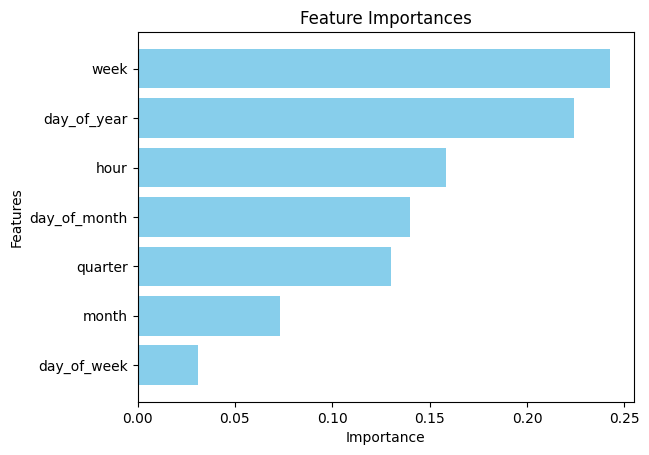

In [47]:
display_feature_importances(cvModel, feature_cols)

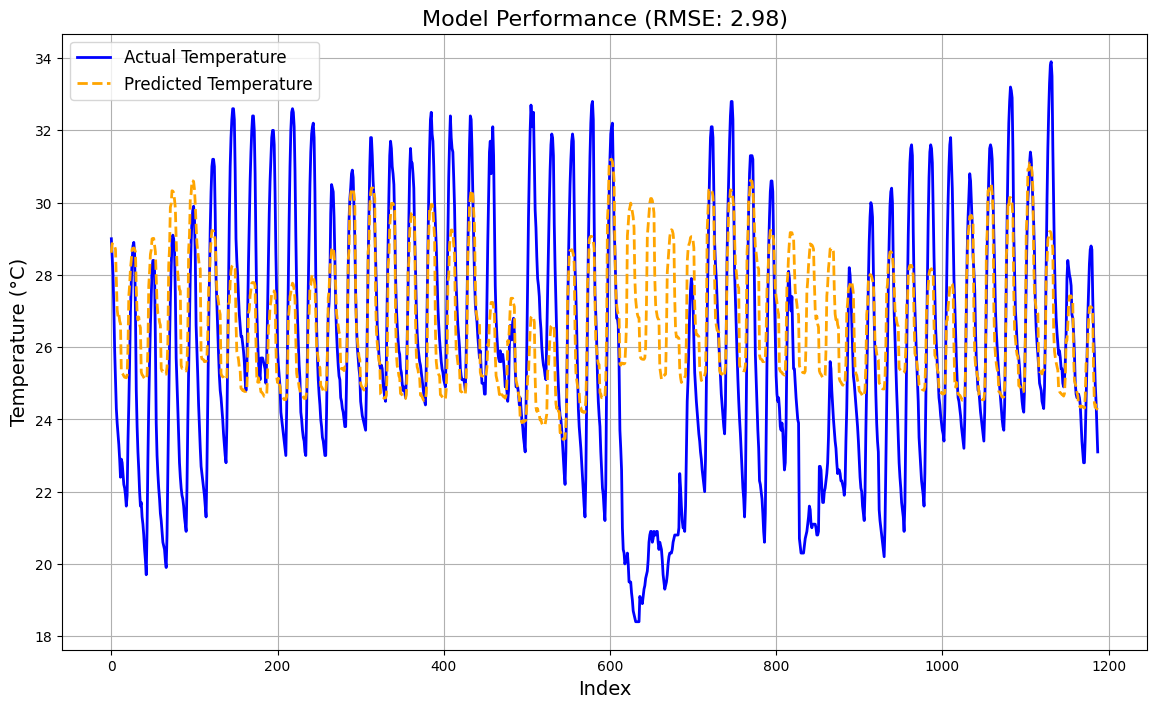

In [48]:
display_model_performance(model, testData)

        Feature  Importance
1          week    0.381389
0          hour    0.161723
6   day_of_year    0.138722
5  day_of_month    0.137955
3       quarter    0.079891
2         month    0.073308
4   day_of_week    0.027011


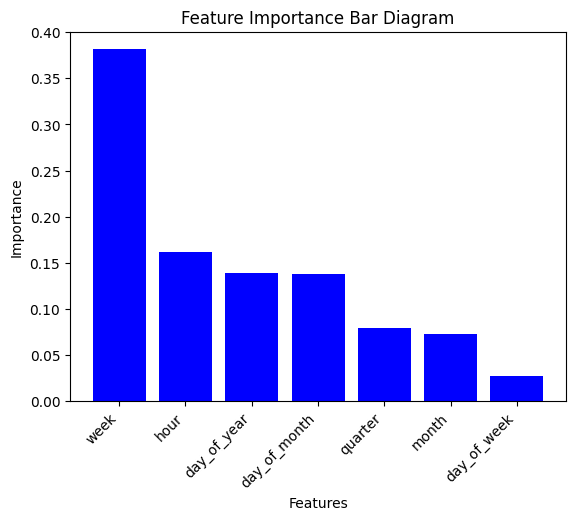

In [ ]:
# # Extract feature importances from the trained RandomForestRegressor model
# feature_importances = cvModel.bestModel.stages[-1].featureImportances
# feature_importance_df = pd.DataFrame({
#     'Feature': assembler.getInputCols(),
#     'Importance': feature_importances.toArray()
# })
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# print(feature_importance_df)

# importance = list(feature_importance_df.Importance )[:]
# Feature = list(feature_importance_df.Feature )[:]

# plt.bar(Feature, importance, color='blue')
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.title('Feature Importance Bar Diagram')
# plt.xticks(rotation=45, ha='right')
# plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# Trích xuất feature importances từ mô hình RandomForestRegressor đã huấn luyện
feature_importances = model.stages[-1].featureImportances

# Tạo DataFrame để lưu trữ các feature và độ quan trọng
feature_importance_df = pd.DataFrame({
    'Feature': assembler.getInputCols(),
    'Importance': feature_importances.toArray()
})

# Sắp xếp theo độ quan trọng giảm dần
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# In ra bảng feature importance
print(feature_importance_df)

# Lấy danh sách độ quan trọng và tên các feature
importance = list(feature_importance_df.Importance)
Feature = list(feature_importance_df.Feature)

# Vẽ biểu đồ bar thể hiện độ quan trọng của các feature
plt.bar(Feature, importance, color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Bar Diagram')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Save the model to a folder
model.save("models/random_forest_model2")

In [ ]:
pip install requests

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 KB 1.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 3.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 KB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests

In [ ]:
# this code scrapes the weather APIs
url = """https://archive-api.open-meteo.com/v1/era5?latitude=52.52&longitude=13.41&start_date=2024-01-01&end_date=2024-03-15&hourly=temperature_2m"""
response = requests.get(url)
print(response)
data_json = response.json()
print(json.dumps(data_json, indent=4))
# this code structures the retrieved data in a form of DataFrame.
df_json = {}
for  item in list(data_json['hourly_units'].keys()) :
    df_json[item] = data_json['hourly'][item]
df_pandas = pd.DataFrame(df_json)  
df_pandas['time'] = pd.to_datetime(df_pandas['time'])
df_pandas    

<Response [200]>
{
    "latitude": 52.54833,
    "longitude": 13.407822,
    "generationtime_ms": 0.10609626770019531,
    "utc_offset_seconds": 0,
    "timezone": "GMT",
    "timezone_abbreviation": "GMT",
    "elevation": 38.0,
    "hourly_units": {
        "time": "iso8601",
        "temperature_2m": "\u00b0C"
    },
    "hourly": {
        "time": [
            "2024-01-01T00:00",
            "2024-01-01T01:00",
            "2024-01-01T02:00",
            "2024-01-01T03:00",
            "2024-01-01T04:00",
            "2024-01-01T05:00",
            "2024-01-01T06:00",
            "2024-01-01T07:00",
            "2024-01-01T08:00",
            "2024-01-01T09:00",
            "2024-01-01T10:00",
            "2024-01-01T11:00",
            "2024-01-01T12:00",
            "2024-01-01T13:00",
            "2024-01-01T14:00",
            "2024-01-01T15:00",
            "2024-01-01T16:00",
            "2024-01-01T17:00",
            "2024-01-01T18:00",
            "2024-01-01T19:00",
    

,time,temperature_2m
0,2024-01-01 00:00:00,5.0
1,2024-01-01 01:00:00,5.4
2,2024-01-01 02:00:00,5.1
3,2024-01-01 03:00:00,4.7
4,2024-01-01 04:00:00,4.4
...,...,...
1795,2024-03-15 19:00:00,11.4
1796,2024-03-15 20:00:00,11.2
1797,2024-03-15 21:00:00,10.4
1798,2024-03-15 22:00:00,10.5


In [ ]:
from pyspark.ml import PipelineModel
from pyspark.ml import Pipeline

# Try loading as a PipelineModel first
try:
    loaded_model = PipelineModel.load("models/random_forest_model/bestModel")
except Exception as e:
    print("Failed to load as PipelineModel, trying Pipeline...")
    try:
        loaded_model = Pipeline.load("models/random_forest_model/bestModel")
    except Exception as e2:
        print("Both loading methods failed.")
        print("PipelineModel error:", e)
        print("Pipeline error:", e2)
        raise e2

# Once loaded, convert your data if needed
if isinstance(df_pandas, pd.DataFrame):
    spark_df = spark.createDataFrame(df_pandas)
else:
    spark_df = df_pandas
feature_list = []
spark_df = spark_df.withColumnRenamed("temperature_2m", "label")
for col in spark_df.columns:
    if col == 'temperature_2m':
        continue
    else:
        feature_list.append(col)
df = spark_df
df = (df
    .withColumn('hour', hour('time'))
    .withColumn('week', weekofyear('time'))
    .withColumn('month', month('time'))
    .withColumn('quarter', quarter('time'))
    .withColumn('day_of_week', dayofweek('time'))
    .withColumn('day_of_month', dayofmonth('time'))
    .withColumn('day_of_year', dayofyear('time'))
)
df.show()
from pyspark.sql.functions import col, to_timestamp

columns_to_normalize = ['hour', 'week', 'month', 'quarter', 'day_of_week', 'day_of_month', 'day_of_year']
for col_name in columns_to_normalize:
    min_value = df.agg({col_name: 'min'}).collect()[0][0]
    max_value = df.agg({col_name: 'max'}).collect()[0][0]
    normalized_column = col_name + '_normalized'
    df = df.withColumn(normalized_column, (col(col_name) - min_value) / (max_value - min_value))
    df = df.drop(col_name).withColumnRenamed(normalized_column, col_name)
df = data.withColumnRenamed('temperature_2m', 'label')
df = df.withColumn("time", to_timestamp("time"))


+-------------------+-----+----+----+-----+-------+-----------+------------+-----------+
|               time|label|hour|week|month|quarter|day_of_week|day_of_month|day_of_year|
+-------------------+-----+----+----+-----+-------+-----------+------------+-----------+
|2024-01-01 00:00:00|  5.0|   0|   1|    1|      1|          2|           1|          1|
|2024-01-01 01:00:00|  5.4|   1|   1|    1|      1|          2|           1|          1|
|2024-01-01 02:00:00|  5.1|   2|   1|    1|      1|          2|           1|          1|
|2024-01-01 03:00:00|  4.7|   3|   1|    1|      1|          2|           1|          1|
|2024-01-01 04:00:00|  4.4|   4|   1|    1|      1|          2|           1|          1|
|2024-01-01 05:00:00|  3.9|   5|   1|    1|      1|          2|           1|          1|
|2024-01-01 06:00:00|  3.8|   6|   1|    1|      1|          2|           1|          1|
|2024-01-01 07:00:00|  3.5|   7|   1|    1|      1|          2|           1|          1|
|2024-01-01 08:00:00|

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `time` cannot be resolved. Did you mean one of the following? [`week`, `datetime`, `hour`, `temp_c`, `month`].;
'Project [datetime#0, temp_c#5, hour#238, week#300, month#362, quarter#424, day_of_week#486, day_of_month#548, day_of_year#610, to_timestamp('time, None, TimestampType, Some(Asia/Bangkok), false) AS time#3195]
+- Project [datetime#0, temp_c#5, hour#238, week#300, month#362, quarter#424, day_of_week#486, day_of_month#548, day_of_year_normalized#590 AS day_of_year#610]
   +- Project [datetime#0, temp_c#5, hour#238, week#300, month#362, quarter#424, day_of_week#486, day_of_month#548, day_of_year_normalized#590]
      +- Project [datetime#0, temp_c#5, day_of_year#139, hour#238, week#300, month#362, quarter#424, day_of_week#486, day_of_month#548, (cast((day_of_year#139 - 1) as double) / cast(323 as double)) AS day_of_year_normalized#590]
         +- Project [datetime#0, temp_c#5, day_of_year#139, hour#238, week#300, month#362, quarter#424, day_of_week#486, day_of_month_normalized#528 AS day_of_month#548]
            +- Project [datetime#0, temp_c#5, day_of_year#139, hour#238, week#300, month#362, quarter#424, day_of_week#486, day_of_month_normalized#528]
               +- Project [datetime#0, temp_c#5, day_of_month#130, day_of_year#139, hour#238, week#300, month#362, quarter#424, day_of_week#486, (cast((day_of_month#130 - 1) as double) / cast(30 as double)) AS day_of_month_normalized#528]
                  +- Project [datetime#0, temp_c#5, day_of_month#130, day_of_year#139, hour#238, week#300, month#362, quarter#424, day_of_week_normalized#466 AS day_of_week#486]
                     +- Project [datetime#0, temp_c#5, day_of_month#130, day_of_year#139, hour#238, week#300, month#362, quarter#424, day_of_week_normalized#466]
                        +- Project [datetime#0, temp_c#5, day_of_week#122, day_of_month#130, day_of_year#139, hour#238, week#300, month#362, quarter#424, (cast((day_of_week#122 - 1) as double) / cast(6 as double)) AS day_of_week_normalized#466]
                           +- Project [datetime#0, temp_c#5, day_of_week#122, day_of_month#130, day_of_year#139, hour#238, week#300, month#362, quarter_normalized#404 AS quarter#424]
                              +- Project [datetime#0, temp_c#5, day_of_week#122, day_of_month#130, day_of_year#139, hour#238, week#300, month#362, quarter_normalized#404]
                                 +- Project [datetime#0, temp_c#5, quarter#115, day_of_week#122, day_of_month#130, day_of_year#139, hour#238, week#300, month#362, (cast((quarter#115 - 1) as double) / cast(3 as double)) AS quarter_normalized#404]
                                    +- Project [datetime#0, temp_c#5, quarter#115, day_of_week#122, day_of_month#130, day_of_year#139, hour#238, week#300, month_normalized#342 AS month#362]
                                       +- Project [datetime#0, temp_c#5, quarter#115, day_of_week#122, day_of_month#130, day_of_year#139, hour#238, week#300, month_normalized#342]
                                          +- Project [datetime#0, temp_c#5, month#109, quarter#115, day_of_week#122, day_of_month#130, day_of_year#139, hour#238, week#300, (cast((month#109 - 1) as double) / cast(10 as double)) AS month_normalized#342]
                                             +- Project [datetime#0, temp_c#5, month#109, quarter#115, day_of_week#122, day_of_month#130, day_of_year#139, hour#238, week_normalized#280 AS week#300]
                                                +- Project [datetime#0, temp_c#5, month#109, quarter#115, day_of_week#122, day_of_month#130, day_of_year#139, hour#238, week_normalized#280]
                                                   +- Project [datetime#0, temp_c#5, week#104, month#109, quarter#115, day_of_week#122, day_of_month#130, day_of_year#139, hour#238, (cast((week#104 - 1) as double) / cast(46 as double)) AS week_normalized#280]
                                                      +- Project [datetime#0, temp_c#5, week#104, month#109, quarter#115, day_of_week#122, day_of_month#130, day_of_year#139, hour_normalized#218 AS hour#238]
                                                         +- Project [datetime#0, temp_c#5, week#104, month#109, quarter#115, day_of_week#122, day_of_month#130, day_of_year#139, hour_normalized#218]
                                                            +- Project [datetime#0, temp_c#5, hour#100, week#104, month#109, quarter#115, day_of_week#122, day_of_month#130, day_of_year#139, (cast((hour#100 - 0) as double) / cast(23 as double)) AS hour_normalized#218]
                                                               +- Project [datetime#0, temp_c#5, hour#100, week#104, month#109, quarter#115, day_of_week#122, day_of_month#130, dayofyear(cast(datetime#0 as date)) AS day_of_year#139]
                                                                  +- Project [datetime#0, temp_c#5, hour#100, week#104, month#109, quarter#115, day_of_week#122, dayofmonth(cast(datetime#0 as date)) AS day_of_month#130]
                                                                     +- Project [datetime#0, temp_c#5, hour#100, week#104, month#109, quarter#115, dayofweek(cast(datetime#0 as date)) AS day_of_week#122]
                                                                        +- Project [datetime#0, temp_c#5, hour#100, week#104, month#109, quarter(cast(datetime#0 as date)) AS quarter#115]
                                                                           +- Project [datetime#0, temp_c#5, hour#100, week#104, month(cast(datetime#0 as date)) AS month#109]
                                                                              +- Project [datetime#0, temp_c#5, hour#100, weekofyear(cast(datetime#0 as date)) AS week#104]
                                                                                 +- Project [datetime#0, temp_c#5, hour(datetime#0, Some(Asia/Bangkok)) AS hour#100]
                                                                                    +- Project [datetime#0, temp_c#5]
                                                                                       +- Sort [datetime#0 ASC NULLS FIRST], true
                                                                                          +- Project [datetime#0, temp_c#5]
                                                                                             +- Relation [datetime#0,name#1,country#2,latitude#3,longitude#4,temp_c#5,wind_mph#6,humidity#7,precip_mm#8,condition#9] parquet


In [ ]:
# Make predictions
predictions = loaded_model.transform(df)
predictions.show()

+-------------------+------+--------------------+----+-----+-------+-------------------+------------+-----------+--------------------+------------------+
|           datetime|temp_c|                hour|week|month|quarter|        day_of_week|day_of_month|day_of_year|            features|        prediction|
+-------------------+------+--------------------+----+-----+-------+-------------------+------------+-----------+--------------------+------------------+
|2024-01-01 00:00:00|  20.7|                 0.0| 0.0|  0.0|    0.0|0.16666666666666666|         0.0|        0.0|(7,[4],[0.1666666...|20.638481311640188|
|2024-01-01 01:00:00|  20.4|0.043478260869565216| 0.0|  0.0|    0.0|0.16666666666666666|         0.0|        0.0|(7,[0,4],[0.04347...|20.638481311640188|
|2024-01-01 02:00:00|  20.0| 0.08695652173913043| 0.0|  0.0|    0.0|0.16666666666666666|         0.0|        0.0|(7,[0,4],[0.08695...|20.638481311640188|
|2024-01-01 03:00:00|  19.8| 0.13043478260869565| 0.0|  0.0|    0.0|0.166666

In [ ]:
df.show(5)

+-------------------+------+--------------------+----+-----+-------+-------------------+------------+-----------+
|           datetime|temp_c|                hour|week|month|quarter|        day_of_week|day_of_month|day_of_year|
+-------------------+------+--------------------+----+-----+-------+-------------------+------------+-----------+
|2024-01-01 00:00:00|  20.7|                 0.0| 0.0|  0.0|    0.0|0.16666666666666666|         0.0|        0.0|
|2024-01-01 01:00:00|  20.4|0.043478260869565216| 0.0|  0.0|    0.0|0.16666666666666666|         0.0|        0.0|
|2024-01-01 02:00:00|  20.0| 0.08695652173913043| 0.0|  0.0|    0.0|0.16666666666666666|         0.0|        0.0|
|2024-01-01 03:00:00|  19.8| 0.13043478260869565| 0.0|  0.0|    0.0|0.16666666666666666|         0.0|        0.0|
|2024-01-01 04:00:00|  19.6| 0.17391304347826086| 0.0|  0.0|    0.0|0.16666666666666666|         0.0|        0.0|
+-------------------+------+--------------------+----+-----+-------+-------------------+